<a href="https://colab.research.google.com/github/Gbell26/Tensor_Flow2.0_Course/blob/main/TF2_0_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

#Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2961 - accuracy: 0.9139 - val_loss: 0.1413 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1440 - accuracy: 0.9571 - val_loss: 0.1013 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1081 - accuracy: 0.9669 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0898 - accuracy: 0.9721 - val_loss: 0.0767 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0760 - accuracy: 0.9762 - val_loss: 0.0738 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0749 - val_accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0594 - accuracy: 0.9805 - val_loss: 0.0762 - val_accur

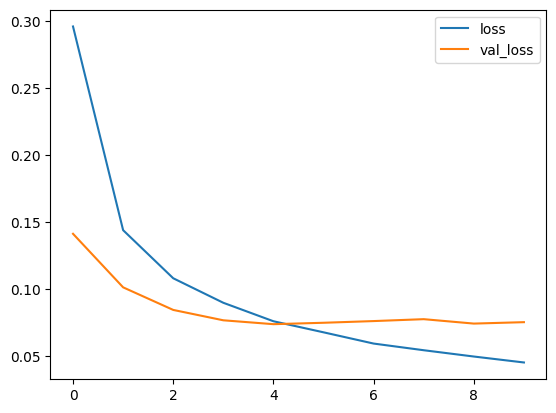

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss',)
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

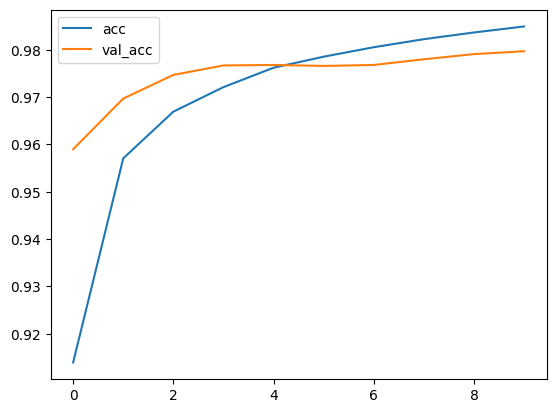

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9797
[0.07534035295248032, 0.9797000288963318]


313/313 [==============================] - 1s 3ms/step


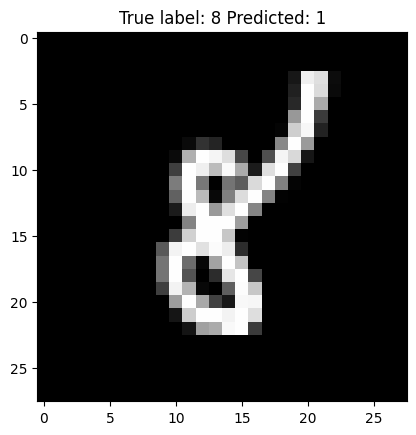

In [ ]:
import numpy as np
p_test = model.predict(x_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));